# TAREA 5  - GRUPO 3

##### Grafico 1
1. Replicar el siguiente gráfico (producción de hoja de coca en hectáreas) lo más parecido posible en términos de color de series por paises, diseño de la series, diseño de la leyenda, nota de pie de página y titulo de los ejes pues la disponibilidad de datos es diferente 2009-2020

In [1]:
#se importaron todas las librerías necesarias para realizar los gráficos y la identificación de las tablas del excel
import pandas as pd
import numpy as np
import warnings
import pyreadstat  # read .sav files
import re
import os

import seaborn as sns  # seaborn lirbary for plot
import matplotlib.pyplot as plt  # matplot
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

warnings.filterwarnings('ignore') 

In [2]:
#se procedió a leer la tabla del excel del cultivo de coca
data = pd.read_excel(r'C:\Users\ALICIA\Documents\GitHub\1ECO35_2023_1\data\produccion_coca\6.1.1_-_Illicit_coca_bush_cultivation.xlsx')
data

,"Global illicit cultivation of coca bush, 2009-2020 (hectares)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2009-01-04 00:00:00,2010-01-04 00:00:00,2011-01-04 00:00:00,2012-01-04 00:00:00,2013-01-05 00:00:00,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bolivia (Plurinational State of),30900,31000,27200,25300,23000,20400.0,20200.0,23100.0,24500.0,23100.0,25500.0,29400.0
4,Colombia a,73000,62000,64000,48000,48000,69000.0,96000.0,146000.0,171000.0,169000.0,154000.0,142800.0
5,Peru b,59900,61200,62500,60400,49800,42900.0,40300.0,43900.0,49900.0,54100.0,54700.0,61800.0
6,Total,163800,154200,153700,133700,120800,132300.0,156500.0,213000.0,245400.0,246200.0,234200.0,234200.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Sources: Plurinational State of Bolivia: natio...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,a) Net area on 31 December.\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# se filtró las columnas 1,3,4,5 que corresponden a los países y a las fechas
#se aplicó transposición para cambiar el orden
data= data.loc[[1,3,4,5],:]
data= data.iloc[:, 1:]
data= data.transpose()
data

,1,3,4,5
Unnamed: 1,2009-01-04 00:00:00,30900,73000,59900
Unnamed: 2,2010-01-04 00:00:00,31000,62000,61200
Unnamed: 3,2011-01-04 00:00:00,27200,64000,62500
Unnamed: 4,2012-01-04 00:00:00,25300,48000,60400
Unnamed: 5,2013-01-05 00:00:00,23000,48000,49800
Unnamed: 6,2014.0,20400.0,69000.0,42900.0
Unnamed: 7,2015.0,20200.0,96000.0,40300.0
Unnamed: 8,2016.0,23100.0,146000.0,43900.0
Unnamed: 9,2017.0,24500.0,171000.0,49900.0
Unnamed: 10,2018.0,23100.0,169000.0,54100.0


In [4]:
#se cambió todas las fechas en un mismo formato ya que en excel están algunas en fecha y otras en número
data['year'] = pd.to_datetime(range(2009, 2021), format='%Y')
data

,1,3,4,5,year
Unnamed: 1,2009-01-04 00:00:00,30900,73000,59900,2009-01-01
Unnamed: 2,2010-01-04 00:00:00,31000,62000,61200,2010-01-01
Unnamed: 3,2011-01-04 00:00:00,27200,64000,62500,2011-01-01
Unnamed: 4,2012-01-04 00:00:00,25300,48000,60400,2012-01-01
Unnamed: 5,2013-01-05 00:00:00,23000,48000,49800,2013-01-01
Unnamed: 6,2014.0,20400.0,69000.0,42900.0,2014-01-01
Unnamed: 7,2015.0,20200.0,96000.0,40300.0,2015-01-01
Unnamed: 8,2016.0,23100.0,146000.0,43900.0,2016-01-01
Unnamed: 9,2017.0,24500.0,171000.0,49900.0,2017-01-01
Unnamed: 10,2018.0,23100.0,169000.0,54100.0,2018-01-01


In [5]:
#se renombraron respectivamente las columnas con los países
data= data.rename(columns = {3:"Bolivia", 4:"Colombia", 5:"Peru"})
data

,1,Bolivia,Colombia,Peru,year
Unnamed: 1,2009-01-04 00:00:00,30900,73000,59900,2009-01-01
Unnamed: 2,2010-01-04 00:00:00,31000,62000,61200,2010-01-01
Unnamed: 3,2011-01-04 00:00:00,27200,64000,62500,2011-01-01
Unnamed: 4,2012-01-04 00:00:00,25300,48000,60400,2012-01-01
Unnamed: 5,2013-01-05 00:00:00,23000,48000,49800,2013-01-01
Unnamed: 6,2014.0,20400.0,69000.0,42900.0,2014-01-01
Unnamed: 7,2015.0,20200.0,96000.0,40300.0,2015-01-01
Unnamed: 8,2016.0,23100.0,146000.0,43900.0,2016-01-01
Unnamed: 9,2017.0,24500.0,171000.0,49900.0,2017-01-01
Unnamed: 10,2018.0,23100.0,169000.0,54100.0,2018-01-01


Gráfico exportado como GRAFICO1_grupo3.png en la carpeta output/plots.


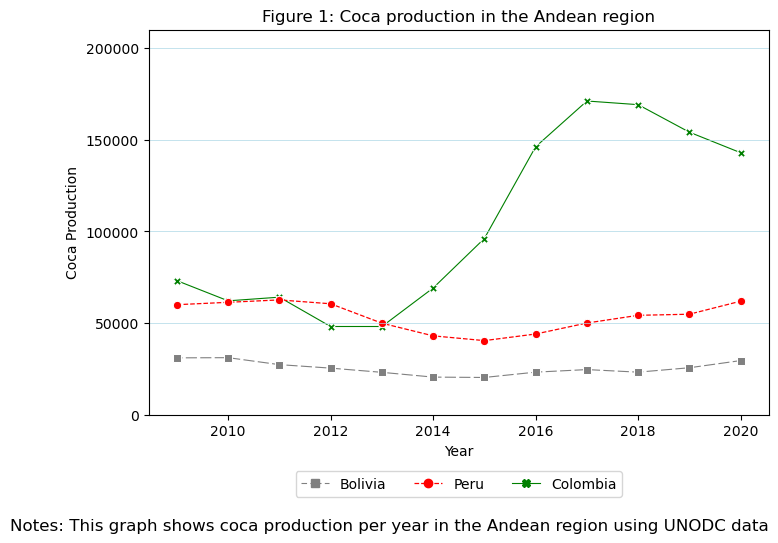

In [6]:
fig, ax = plt.subplots(figsize=(8,5))

sns.lineplot(x="year", y="Bolivia", data=data, color="gray", legend=False, linewidth=0.8, linestyle=(5, (10, 3)), marker='s', markersize=6)
sns.lineplot(x="year", y="Colombia", data=data, color="green", legend=False, linewidth=0.8, marker='X', markersize=6)
sns.lineplot(x="year", y="Peru", data=data, color="red", legend=False, linewidth=0.9, linestyle='--', marker='o', markersize=6)

plt.xlabel('Year')
plt.ylabel('Coca Production')
ax.set_yticks(range(0, 250000, 50000))

plt.title('Figure 1: Coca production in the Andean region')

custom_legend = [
    Line2D([0], [0], color='gray', linestyle=(5, (10, 3)), linewidth=0.8, marker='s', markersize=6),
    Line2D([0], [0], color='red', linestyle='--', linewidth=0.9, marker='o', markersize=6),
    Line2D([0], [0], color='green', linewidth=0.8, marker='X', markersize=6)
]

plt.legend(custom_legend, ['Bolivia', 'Peru', 'Colombia'], loc='upper center', bbox_to_anchor=(0.5, -0.13), ncol=3)

ax.autoscale(False)

yticks = ax.get_yticks()

for y in yticks:
    ax.axhline(y=y, color='lightblue', linestyle='-', linewidth=0.5)

ylim_min = ax.get_ylim()[0]
ylim_max = ax.get_ylim()[1]
ax.set_ylim(ylim_min, ylim_max * 1.05)

ax.annotate("Notes: This graph shows coca production per year in the Andean region using UNODC data", xy=(1, -0.30), xycoords="axes fraction", color='black', size=12, ha='right')

# plt.show()


# Guarda el gráfico en formato .png
ruta_imagen = r'C:\Users\ALICIA\Documents\GitHub\1ECO35_2023_1\output\plots\GRAFICO1_grupo3.png'
plt.savefig(ruta_imagen, dpi=300, bbox_inches='tight')

# Muestra el mensaje de confirmación
print("Gráfico exportado como GRAFICO1_grupo3.png en la carpeta output/plots.")

##### Grafico 2
2. Relizar un gráfico similar con los datos de erradicación de hectareas de hoja de Coca.


In [7]:
#se procedió a leer la tabla del excel del cultivo de coca
data = pd.read_excel(r'C:\Users\ALICIA\Documents\GitHub\1ECO35_2023_1\data\produccion_coca\6.1.2_-_Eradication_of_coca_bush.xlsx')
data

,Unnamed: 0,Unnamed: 1,"Reported eradication of coca bush, 2009-2020",Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,NaN,NaN,NaN,Method of eradication,Unit,2009.00,2010.00,2011.00,2012.00,2013.000,2014.0000,2015.000,2016.0,2017.00,2018.00,2019.00,2020.00,source 2020
1,NaN,NaN,Bolivia (Plurinational State of),manual,hectare,6341.00,8200.00,10509.00,11044.00,11407.000,11144.0000,11020.000,6577.0,7237.00,11174.00,9205.00,2177.00,https://www.unodc.org/documents/crop-monitorin...
2,NaN,NaN,Colombia,manual,hectare,165336.95,145743.69,138503.23,131004.75,69173.469,67234.5178,49967.463,17642.0,52000.67,59977.95,94606.00,130147.33,ARQ2020
3,NaN,NaN,Peru,manual,hectare,10025.00,12033.00,10290.00,14171.00,23785.000,31206.0000,35868.000,30151.0,25784.00,25106.67,25526.31,6272.80,ARQ2020
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,Source: United Nations Office on Drugs and Cri...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#data_g = data.iloc[0:4, 2:17]  # creamos un nuevo DF desde la fila 0 hasta la 4 y las columna 2 hasta la 17
#data_g= data_g.transpose()

#data_n= data.loc[[2,3,4,],:]
#data_n= data.iloc[:, 2:17]
#data_n= data_n.transpose()
#data_g

In [9]:
data_n = data.iloc[0:4, 2:17]  # creamos un nuevo DF desde la fila 0 hasta la 4 y las columna 2 hasta la 17

#data_n= data.loc[[2,3,4,],:]
#data_n= data.iloc[:, 2:17]
#data_n= data_n.transpose()
data_n

,"Reported eradication of coca bush, 2009-2020",Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,NaN,Method of eradication,Unit,2009.00,2010.00,2011.00,2012.00,2013.000,2014.0000,2015.000,2016.0,2017.00,2018.00,2019.00,2020.00
1,Bolivia (Plurinational State of),manual,hectare,6341.00,8200.00,10509.00,11044.00,11407.000,11144.0000,11020.000,6577.0,7237.00,11174.00,9205.00,2177.00
2,Colombia,manual,hectare,165336.95,145743.69,138503.23,131004.75,69173.469,67234.5178,49967.463,17642.0,52000.67,59977.95,94606.00,130147.33
3,Peru,manual,hectare,10025.00,12033.00,10290.00,14171.00,23785.000,31206.0000,35868.000,30151.0,25784.00,25106.67,25526.31,6272.80


In [10]:
#Renombramos el encabezado con los valores de lo que era la primera columna
data_f= data_n.rename(columns=data_n.iloc[0]).drop(data_n.index[0]).reset_index(drop=True)
data_f

,NaN,Method of eradication,Unit,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
0,Bolivia (Plurinational State of),manual,hectare,6341.00,8200.00,10509.00,11044.00,11407.000,11144.0000,11020.000,6577.0,7237.00,11174.00,9205.00,2177.00
1,Colombia,manual,hectare,165336.95,145743.69,138503.23,131004.75,69173.469,67234.5178,49967.463,17642.0,52000.67,59977.95,94606.00,130147.33
2,Peru,manual,hectare,10025.00,12033.00,10290.00,14171.00,23785.000,31206.0000,35868.000,30151.0,25784.00,25106.67,25526.31,6272.80


In [11]:
# Convertirmos los años 2009 al 2020 a tipo object
conversion = [2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0]
data_f[conversion] = data_f[conversion].astype(str)

In [12]:
# Verificar que el formato del encabezado sea tipo texto
header_format = data_f.dtypes
print(header_format)

NaN                      object
Method of eradication    object
Unit                     object
2009.0                   object
2010.0                   object
2011.0                   object
2012.0                   object
2013.0                   object
2014.0                   object
2015.0                   object
2016.0                   object
2017.0                   object
2018.0                   object
2019.0                   object
2020.0                   object
dtype: object


In [13]:
data_f = data_f.drop(['Method of eradication', 'Unit'], axis=1)
data_f

,NaN,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
0,Bolivia (Plurinational State of),6341.0,8200.0,10509.0,11044.0,11407.0,11144.0,11020.0,6577.0,7237.0,11174.0,9205.0,2177.0
1,Colombia,165336.95,145743.69,138503.23,131004.75,69173.469,67234.5178,49967.463,17642.0,52000.67,59977.95,94606.0,130147.33
2,Peru,10025.0,12033.0,10290.0,14171.0,23785.0,31206.0,35868.0,30151.0,25784.0,25106.67,25526.31,6272.8


In [14]:
data_g= data_f.transpose()
data_g

,0,1,2
NaN,Bolivia (Plurinational State of),Colombia,Peru
2009.0,6341.0,165336.95,10025.0
2010.0,8200.0,145743.69,12033.0
2011.0,10509.0,138503.23,10290.0
2012.0,11044.0,131004.75,14171.0
2013.0,11407.0,69173.469,23785.0
2014.0,11144.0,67234.5178,31206.0
2015.0,11020.0,49967.463,35868.0
2016.0,6577.0,17642.0,30151.0
2017.0,7237.0,52000.67,25784.0


In [15]:
data_g.columns = data_g.iloc[0]
data_g = data_g[1:]
data_g

nan,Bolivia (Plurinational State of),Colombia,Peru
2009.0,6341.0,165336.95,10025.0
2010.0,8200.0,145743.69,12033.0
2011.0,10509.0,138503.23,10290.0
2012.0,11044.0,131004.75,14171.0
2013.0,11407.0,69173.469,23785.0
2014.0,11144.0,67234.5178,31206.0
2015.0,11020.0,49967.463,35868.0
2016.0,6577.0,17642.0,30151.0
2017.0,7237.0,52000.67,25784.0
2018.0,11174.0,59977.95,25106.67


In [16]:
data_g['year'] = pd.to_datetime(range(2009, 2021), format='%Y')


#data_g = data_g.rename(columns={'': 'year'})
#data_g.rename(columns={'nan': 'year'}, inplace=True)
data_g

nan,Bolivia (Plurinational State of),Colombia,Peru,year
2009.0,6341.0,165336.95,10025.0,2009-01-01
2010.0,8200.0,145743.69,12033.0,2010-01-01
2011.0,10509.0,138503.23,10290.0,2011-01-01
2012.0,11044.0,131004.75,14171.0,2012-01-01
2013.0,11407.0,69173.469,23785.0,2013-01-01
2014.0,11144.0,67234.5178,31206.0,2014-01-01
2015.0,11020.0,49967.463,35868.0,2015-01-01
2016.0,6577.0,17642.0,30151.0,2016-01-01
2017.0,7237.0,52000.67,25784.0,2017-01-01
2018.0,11174.0,59977.95,25106.67,2018-01-01


Gráfico exportado como GRAFICO2_grupo3.png en la carpeta output/plots.


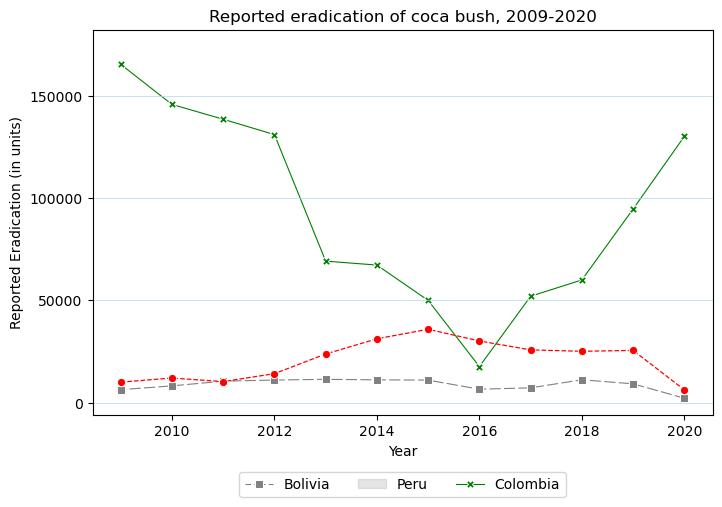

In [17]:

data_p = {
    'nan': [2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0],
    'Bolivia (Plurinational State of)': [6341.0, 8200.0, 10509.0, 11044.0, 11407.0, 11144.0, 11020.0, 6577.0, 7237.0, 11174.0, 9205.0, 2177.0],
    'Colombia': [165336.95, 145743.69, 138503.23, 131004.75, 69173.469, 67234.5178, 49967.463, 17642.0, 52000.67, 59977.95, 94606.0, 130147.33],
    'Peru': [10025.0, 12033.0, 10290.0, 14171.0, 23785.0, 31206.0, 35868.0, 30151.0, 25784.0, 25106.67, 25526.31, 6272.8]
}

#data_df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(8, 5))

sns.lineplot(x='nan', y='Bolivia (Plurinational State of)', data=data_p, color='gray', legend=False, linewidth=0.8, linestyle=(5, (10, 3)), marker='s', markersize=6)
sns.lineplot(x='nan', y='Colombia', data=data_p, color='green', legend=False, linewidth=0.8, marker='X', markersize=6)
sns.lineplot(x='nan', y='Peru', data=data_p, color='red', legend=False, linewidth=0.9, linestyle='--', marker='o', markersize=6)

plt.xlabel('Year')
plt.ylabel('Reported Eradication (in units)')
ax.set_yticks(range(0, 200000, 50000))

plt.title('Reported eradication of coca bush, 2009-2020')
plt.legend(labels=['Bolivia','Peru', 'Colombia'], loc='upper center', bbox_to_anchor=(0.5, -0.13), ncol=3)

ax.autoscale(False)

yticks = ax.get_yticks()

for y in yticks:
    ax.axhline(y=y, color='lightblue', linestyle='-', linewidth=0.5)

ylim_min = ax.get_ylim()[0]
ylim_max = ax.get_ylim()[1]
ax.set_ylim(ylim_min, ylim_max * 1.05)

# plt.show()

# Guarda el gráfico en formato .png
ruta_imagen = r'C:\Users\ALICIA\Documents\GitHub\1ECO35_2023_1\output\plots\GRAFICO2_grupo3.png'
plt.savefig(ruta_imagen, dpi=300, bbox_inches='tight')

# Muestra el mensaje de confirmación
print("Gráfico exportado como GRAFICO2_grupo3.png en la carpeta output/plots.")


##### Grafico 3
Realizar un gráfico con la producción y erradicación de hoja de coca en el Perú.

In [18]:
# Convertimos las datas que tenemos en DF para que se pueda hacer el merge
data=pd.DataFrame(data)
data_g=pd.DataFrame(data_g)

Gráfico exportado como GRAFICO3_grupo3.png en la carpeta output/plots.


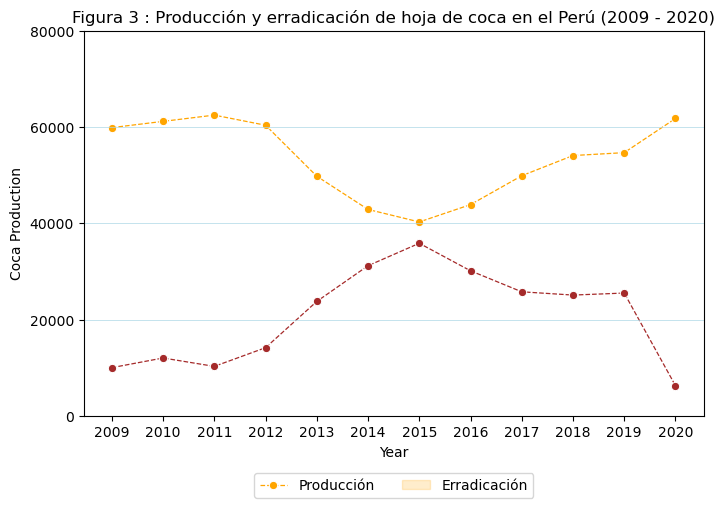

In [19]:


# DataFrame
data = {
    'Peru_1': [59900, 61200, 62500, 60400, 49800, 42900, 40300, 43900, 49900, 54100, 54700, 61800],
    'year': ['2009', '2010', '2011', '2012', '2013', '2014',
             '2015', '2016', '2017', '2018', '2019', '2020'],
    'Peru_2': [10025.0, 12033.0, 10290.0, 14171.0, 23785.0, 31206.0, 35868.0, 30151.0,
               25784.0, 25106.67, 25526.31, 6272.8]
}

df = pd.DataFrame(data)

# Plot
fig, ax = plt.subplots(figsize=(8, 5))

sns.lineplot(x='year', y='Peru_1', data=df, color='orange', legend=False, linewidth=0.9,
             linestyle='--', marker='o', markersize=6)

sns.lineplot(x='year', y='Peru_2', data=df, color='brown', legend=False, linewidth=0.9,
             linestyle='--', marker='o', markersize=6)

plt.xlabel('Year')
plt.ylabel('Coca Production')


# Ajustar el eje y
max_value = max(df['Peru_1'].max(), df['Peru_2'].max())
ax.set_ylim([0, max_value + 5000])

ax.set_yticks(range(0, 100000, 20000))


yticks = ax.get_yticks()

for y in yticks:
    ax.axhline(y=y, color='lightblue', linestyle='-', linewidth=0.5)


plt.title('Figura 3 : Producción y erradicación de hoja de coca en el Perú (2009 - 2020)')
plt.legend(labels=['Producción', 'Erradicación'], loc='upper center', bbox_to_anchor=(0.5, -0.13), ncol=3)

#plt.show()

# Guarda el gráfico en formato .png
ruta_imagen = r'C:\Users\ALICIA\Documents\GitHub\1ECO35_2023_1\output\plots\GRAFICO3_grupo3.png'
plt.savefig(ruta_imagen, dpi=300, bbox_inches='tight')

# Muestra el mensaje de confirmación
print("Gráfico exportado como GRAFICO3_grupo3.png en la carpeta output/plots.")

# Regex
1. La base de datos metropolitano.xlsx posse información de latitud y longitud de las estaciones del metropiltano y dos lineas de alimentadores. Usar regex para cambiar el formato de las coordenadas a uno de coordenadas geográficos (i.e -11.25, -69.56). Guiese de la aplicación a las coordenadas del Capac Ñan usada en el script de python.

In [20]:
#se procedió a leer la base de datos
base1 = pd.read_excel(r'C:\Users\ALICIA\Documents\GitHub\1ECO35_2023_1\data\metropolitano.xlsx')
base1

,id,id_transport,cod_district,district,transport_type,station_name,sur_latitud,oeste_longitud
0,1,1,150112.0,independencia,metropolitano,E. NARANJAL,"11°58'51.19""S","77° 3'31.63""O"
1,2,1,150112.0,independencia,metropolitano,IZAGUIRRE,"11°59'22.96""S","77° 3'25.30""O"
2,3,1,150112.0,independencia,metropolitano,PACIFICO E1,"11°59'41.19""S","77° 3'21.84""O"
3,4,1,150112.0,independencia,metropolitano,INDEPENDENCIA E1,"11°59'55.00""S","77° 3'18.79""O"
4,5,1,150112.0,independencia,metropolitano,JAZMINES E1,"12° 0'7.88""S","77° 3'17.16""O"
...,...,...,...,...,...,...,...,...
135,154,1,NaN,NaN,alimentador_8,ABTAO,"12° 3'28.98""S","77° 1'20.22""O"
136,155,1,NaN,NaN,alimentador_8,ANDAHUAYLAS,"12° 3'30.81""S","77° 1'34.43""O"
137,156,1,NaN,NaN,alimentador_8,ABANCAY,"12° 3'32.80""S","77° 1'49.73""O"
138,157,1,NaN,NaN,alimentador_8,ESTACIÓN CENTRAL,"12° 3'30.64""S","77° 2'11.10""O"


In [21]:
#se hizo la limpieza de la base de datos

data1 = base1[base1.id.isna()].reset_index(drop = True)
data2 = base1[~ base1.id.isna()].reset_index(drop = True)

In [22]:
#se muestra la composición de filas y columnas
data2.shape

(140, 8)

In [23]:
#se muestra los nombres de todas las columnas
print(data2.columns)

Index(['id', 'id_transport', 'cod_district', 'district', 'transport_type',
       'station_name', 'sur_latitud', 'oeste_longitud'],
      dtype='object')


In [24]:
#se define la función de conversión de coordenadas
def convert_gps(x):
    signo = -1 if re.search('[swSWoO-]', x) else 1
    regex = re.compile(r"([0-9.]+)")
    values = regex.findall(x)
    if len(values) >= 2:
        h = float(values[0])
        m = float(values[1])
        if len(values) == 3:
            s = float(values[2])
        else:
            s = 0.0
        return signo * (h + m / 60 + s / 3600)
    return None

#se aplica la función convert_gps a las columnas 'sur_latitud' y 'oeste_longitud'
base1['Latitud'] = base1['sur_latitud'].apply(convert_gps)
base1['Longitud'] = base1['oeste_longitud'].apply(convert_gps)

#se guarda el DataFrame en un archivo CSV para visualizar todas las columnas sin restricciones de visualización.
base1.to_csv('metropolitano.csv', index=False)

print("DataFrame guardado como metropolitano.csv")

base1

DataFrame guardado como metropolitano.csv


,id,id_transport,cod_district,district,transport_type,station_name,sur_latitud,oeste_longitud,Latitud,Longitud
0,1,1,150112.0,independencia,metropolitano,E. NARANJAL,"11°58'51.19""S","77° 3'31.63""O",-11.980886,-77.058786
1,2,1,150112.0,independencia,metropolitano,IZAGUIRRE,"11°59'22.96""S","77° 3'25.30""O",-11.989711,-77.057028
2,3,1,150112.0,independencia,metropolitano,PACIFICO E1,"11°59'41.19""S","77° 3'21.84""O",-11.994775,-77.056067
3,4,1,150112.0,independencia,metropolitano,INDEPENDENCIA E1,"11°59'55.00""S","77° 3'18.79""O",-11.998611,-77.055219
4,5,1,150112.0,independencia,metropolitano,JAZMINES E1,"12° 0'7.88""S","77° 3'17.16""O",-12.002189,-77.054767
...,...,...,...,...,...,...,...,...,...,...
135,154,1,NaN,NaN,alimentador_8,ABTAO,"12° 3'28.98""S","77° 1'20.22""O",-12.058050,-77.022283
136,155,1,NaN,NaN,alimentador_8,ANDAHUAYLAS,"12° 3'30.81""S","77° 1'34.43""O",-12.058558,-77.026231
137,156,1,NaN,NaN,alimentador_8,ABANCAY,"12° 3'32.80""S","77° 1'49.73""O",-12.059111,-77.030481
138,157,1,NaN,NaN,alimentador_8,ESTACIÓN CENTRAL,"12° 3'30.64""S","77° 2'11.10""O",-12.058511,-77.036417


# Regex
2. En la carpeta estudiantes, ustedes encontrarán una base de datos llamada base_estudiantes.xlsx (Una base de datos muy sucia). La base de datos contiene información de estudiantes de la educación básica regular. Las variables son las siguientes: nombre, edad, fecha de nacimiento, tipo de administración de la institución educativa, género, correro electrónico, dni del apoderado, madre o padre, y una variable con observaciones.


In [25]:
#se procedió a leer la base de datos
estudiantes = pd.read_excel( r'C:\Users\ALICIA\Documents\GitHub\1ECO35_2023_1\data\estudiantes\base_students.xlsx')
estudiantes

,NAME,BORN_DATE,AGE,TYPE_ADM_SCHOOL,GENDER,MAIL,DNI_NUMBER,observaciones
0,JOAN AYALA FERRERAS --- =9,"23 /08/1998 ""#%",!#10,publico,M ALEE,albatros001@wandoo.es,dni padre: 04-156597865,nombre correcto es Roberto daga rios
1,JOAN 3 BAEZ TEJADO,22/02/2004 !,15,privade,mal,albert@intercom.es,dni padre: 02-156597865,NaN
2,MARC BASTARDES SOTO -,05 /01/1998,****14,public0,malllle,alien_10@intercom.es,01-156597872,edad correta es 15
3,JOSEP ANGUERA VILAFRANCA,21/02/1999,16,public,mal ee,amores@hotmail.com,dni madre 01-156597872,NaN
4,JOAN ANDREU CRUZ /,27/06/1982 00:00,15,public,m al,anabel@altecom.es,01-156597872,NaN
5,JORDI RAYA 73738 )= GAVILAN,15/06/1991,17,publico,maleeee,antig56a@minorisa.es,dni padre: 01-156597865,"Beneficiado del programa Juntos, tiene 4 hermanos"
6,********** ARAN ALVAREZ FERNÁNDEZ,03/09 /1993,!12,public,malllle,ballador_rios@hotmail.com,dni madre 01-156597872,NaN
7,JAVIER BENITEZ JOSE3,18/02/1975,11,public,malllle,balladora@altecom.es,dni madre 01-156597872,asiste a una II.EE de jornada completa
8,MARIO PASCUAL FLORES,14/11/1986 00:00,8,privde,malll le,barbilla@hotmail.com,dni madre 01-156597872,NaN
9,JESUS AYALA TORNÉ,16/08/1993,9,prvade,male,besugo13@minorisa.es,dni padre: 02-156597865,"nombre correcto es Jesus Mendieta Jimenez, asi..."


In [26]:
import re
import unicodedata
from unidecode import unidecode

#se hizo limpieza de datos en la columna "NAME" utilizando expresiones regulares y preservando las tildes
estudiantes['NAME'] = estudiantes['NAME'].apply(lambda x: re.sub(r'[^a-zA-ZáéíóúÁÉÍÓÚñÑ ]', '', x))  # Eliminar caracteres no deseados
estudiantes['NAME'] = estudiantes['NAME'].apply(lambda x: x.title())  # Convertir el texto a formato de título (mayúsculas en la primera letra de cada palabra)

#se mostró el DataFrame actualizado
estudiantes


,NAME,BORN_DATE,AGE,TYPE_ADM_SCHOOL,GENDER,MAIL,DNI_NUMBER,observaciones
0,Joan Ayala Ferreras,"23 /08/1998 ""#%",!#10,publico,M ALEE,albatros001@wandoo.es,dni padre: 04-156597865,nombre correcto es Roberto daga rios
1,Joan Baez Tejado,22/02/2004 !,15,privade,mal,albert@intercom.es,dni padre: 02-156597865,NaN
2,Marc Bastardes Soto,05 /01/1998,****14,public0,malllle,alien_10@intercom.es,01-156597872,edad correta es 15
3,Josep Anguera Vilafranca,21/02/1999,16,public,mal ee,amores@hotmail.com,dni madre 01-156597872,NaN
4,Joan Andreu Cruz,27/06/1982 00:00,15,public,m al,anabel@altecom.es,01-156597872,NaN
5,Jordi Raya Gavilan,15/06/1991,17,publico,maleeee,antig56a@minorisa.es,dni padre: 01-156597865,"Beneficiado del programa Juntos, tiene 4 hermanos"
6,Aran Alvarez Fernández,03/09 /1993,!12,public,malllle,ballador_rios@hotmail.com,dni madre 01-156597872,NaN
7,Javier Benitez Jose,18/02/1975,11,public,malllle,balladora@altecom.es,dni madre 01-156597872,asiste a una II.EE de jornada completa
8,Mario Pascual Flores,14/11/1986 00:00,8,privde,malll le,barbilla@hotmail.com,dni madre 01-156597872,NaN
9,Jesus Ayala Torné,16/08/1993,9,prvade,male,besugo13@minorisa.es,dni padre: 02-156597865,"nombre correcto es Jesus Mendieta Jimenez, asi..."


In [27]:
#se hizo limpieza de datos de  la columna "AGE"
age_pattern = r'(\d+)'  # Expresión regular para extraer solo dígitos
estudiantes['AGE'] = estudiantes['AGE'].astype(str).apply(lambda x: re.search(age_pattern, x)[0] if re.search(age_pattern, x) else pd.NA)
estudiantes['AGE'] = pd.to_numeric(estudiantes['AGE'], errors='coerce')
estudiantes

,NAME,BORN_DATE,AGE,TYPE_ADM_SCHOOL,GENDER,MAIL,DNI_NUMBER,observaciones
0,Joan Ayala Ferreras,"23 /08/1998 ""#%",10.0,publico,M ALEE,albatros001@wandoo.es,dni padre: 04-156597865,nombre correcto es Roberto daga rios
1,Joan Baez Tejado,22/02/2004 !,15.0,privade,mal,albert@intercom.es,dni padre: 02-156597865,NaN
2,Marc Bastardes Soto,05 /01/1998,14.0,public0,malllle,alien_10@intercom.es,01-156597872,edad correta es 15
3,Josep Anguera Vilafranca,21/02/1999,16.0,public,mal ee,amores@hotmail.com,dni madre 01-156597872,NaN
4,Joan Andreu Cruz,27/06/1982 00:00,15.0,public,m al,anabel@altecom.es,01-156597872,NaN
5,Jordi Raya Gavilan,15/06/1991,17.0,publico,maleeee,antig56a@minorisa.es,dni padre: 01-156597865,"Beneficiado del programa Juntos, tiene 4 hermanos"
6,Aran Alvarez Fernández,03/09 /1993,12.0,public,malllle,ballador_rios@hotmail.com,dni madre 01-156597872,NaN
7,Javier Benitez Jose,18/02/1975,11.0,public,malllle,balladora@altecom.es,dni madre 01-156597872,asiste a una II.EE de jornada completa
8,Mario Pascual Flores,14/11/1986 00:00,8.0,privde,malll le,barbilla@hotmail.com,dni madre 01-156597872,NaN
9,Jesus Ayala Torné,16/08/1993,9.0,prvade,male,besugo13@minorisa.es,dni padre: 02-156597865,"nombre correcto es Jesus Mendieta Jimenez, asi..."


In [28]:
from datetime import datetime

#se definió la expresión regular para eliminar caracteres no deseados y espacios
regex = re.compile(r'[^\d/]|^\s+|\s+$')

#se hizo limpieza de los datos en la columna 'BORN_DATE'
estudiantes['BORN_DATE'] = estudiantes['BORN_DATE'].astype(str).str.replace(regex, '')

#se verificó si la columna contiene solo la fecha o también la hora
estudiantes['BORN_DATE'] = estudiantes['BORN_DATE'].apply(lambda x: x.split()[0] if ' ' in x else x)

#se eliminó los cuatro ceros al final de la fecha
estudiantes['BORN_DATE'] = estudiantes['BORN_DATE'].str.replace('0000$', '')

#se convirtió los valores a fechas y asigna NaN a los valores no válidos
estudiantes['BORN_DATE'] = estudiantes['BORN_DATE'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y') if re.match(r'\d{2}/\d{2}/\d{4}$', x) else float('nan'))


#precisar que hay valores en born_date en que la fecha no es reconocible pues no está llenada o dice 1000 o 000 por ello tiene NaT
estudiantes

,NAME,BORN_DATE,AGE,TYPE_ADM_SCHOOL,GENDER,MAIL,DNI_NUMBER,observaciones
0,Joan Ayala Ferreras,1998-08-23,10.0,publico,M ALEE,albatros001@wandoo.es,dni padre: 04-156597865,nombre correcto es Roberto daga rios
1,Joan Baez Tejado,2004-02-22,15.0,privade,mal,albert@intercom.es,dni padre: 02-156597865,NaN
2,Marc Bastardes Soto,1998-01-05,14.0,public0,malllle,alien_10@intercom.es,01-156597872,edad correta es 15
3,Josep Anguera Vilafranca,1999-02-21,16.0,public,mal ee,amores@hotmail.com,dni madre 01-156597872,NaN
4,Joan Andreu Cruz,1982-06-27,15.0,public,m al,anabel@altecom.es,01-156597872,NaN
5,Jordi Raya Gavilan,1991-06-15,17.0,publico,maleeee,antig56a@minorisa.es,dni padre: 01-156597865,"Beneficiado del programa Juntos, tiene 4 hermanos"
6,Aran Alvarez Fernández,1993-09-03,12.0,public,malllle,ballador_rios@hotmail.com,dni madre 01-156597872,NaN
7,Javier Benitez Jose,1975-02-18,11.0,public,malllle,balladora@altecom.es,dni madre 01-156597872,asiste a una II.EE de jornada completa
8,Mario Pascual Flores,1986-11-14,8.0,privde,malll le,barbilla@hotmail.com,dni madre 01-156597872,NaN
9,Jesus Ayala Torné,1993-08-16,9.0,prvade,male,besugo13@minorisa.es,dni padre: 02-156597865,"nombre correcto es Jesus Mendieta Jimenez, asi..."


In [29]:
#si la columna "BORN_DATE" no está en formato de fecha, se convertirá
estudiantes['BORN_DATE'] = pd.to_datetime(estudiantes['BORN_DATE'], errors='coerce')

#se extrajo el año utilizando expresiones regulares
estudiantes['año_de_nacimiento'] = estudiantes['BORN_DATE'].astype(str).str.extract(r'(\d{4})')

#se convirtió la columna "año_de_nacimiento" a tipo numérico
estudiantes['año_de_nacimiento'] = pd.to_numeric(estudiantes['año_de_nacimiento'], errors='coerce')
estudiantes

,NAME,BORN_DATE,AGE,TYPE_ADM_SCHOOL,GENDER,MAIL,DNI_NUMBER,observaciones,año_de_nacimiento
0,Joan Ayala Ferreras,1998-08-23,10.0,publico,M ALEE,albatros001@wandoo.es,dni padre: 04-156597865,nombre correcto es Roberto daga rios,1998.0
1,Joan Baez Tejado,2004-02-22,15.0,privade,mal,albert@intercom.es,dni padre: 02-156597865,NaN,2004.0
2,Marc Bastardes Soto,1998-01-05,14.0,public0,malllle,alien_10@intercom.es,01-156597872,edad correta es 15,1998.0
3,Josep Anguera Vilafranca,1999-02-21,16.0,public,mal ee,amores@hotmail.com,dni madre 01-156597872,NaN,1999.0
4,Joan Andreu Cruz,1982-06-27,15.0,public,m al,anabel@altecom.es,01-156597872,NaN,1982.0
5,Jordi Raya Gavilan,1991-06-15,17.0,publico,maleeee,antig56a@minorisa.es,dni padre: 01-156597865,"Beneficiado del programa Juntos, tiene 4 hermanos",1991.0
6,Aran Alvarez Fernández,1993-09-03,12.0,public,malllle,ballador_rios@hotmail.com,dni madre 01-156597872,NaN,1993.0
7,Javier Benitez Jose,1975-02-18,11.0,public,malllle,balladora@altecom.es,dni madre 01-156597872,asiste a una II.EE de jornada completa,1975.0
8,Mario Pascual Flores,1986-11-14,8.0,privde,malll le,barbilla@hotmail.com,dni madre 01-156597872,NaN,1986.0
9,Jesus Ayala Torné,1993-08-16,9.0,prvade,male,besugo13@minorisa.es,dni padre: 02-156597865,"nombre correcto es Jesus Mendieta Jimenez, asi...",1993.0


In [30]:
# Se creó una dummy para el género (gender) utilizando expresión regular
estudiantes['género'] = np.where(estudiantes['GENDER'].str.contains(r'^f', flags=re.IGNORECASE, regex=True), 1, 0)
estudiantes

,NAME,BORN_DATE,AGE,TYPE_ADM_SCHOOL,GENDER,MAIL,DNI_NUMBER,observaciones,año_de_nacimiento,género
0,Joan Ayala Ferreras,1998-08-23,10.0,publico,M ALEE,albatros001@wandoo.es,dni padre: 04-156597865,nombre correcto es Roberto daga rios,1998.0,0
1,Joan Baez Tejado,2004-02-22,15.0,privade,mal,albert@intercom.es,dni padre: 02-156597865,NaN,2004.0,0
2,Marc Bastardes Soto,1998-01-05,14.0,public0,malllle,alien_10@intercom.es,01-156597872,edad correta es 15,1998.0,0
3,Josep Anguera Vilafranca,1999-02-21,16.0,public,mal ee,amores@hotmail.com,dni madre 01-156597872,NaN,1999.0,0
4,Joan Andreu Cruz,1982-06-27,15.0,public,m al,anabel@altecom.es,01-156597872,NaN,1982.0,0
5,Jordi Raya Gavilan,1991-06-15,17.0,publico,maleeee,antig56a@minorisa.es,dni padre: 01-156597865,"Beneficiado del programa Juntos, tiene 4 hermanos",1991.0,0
6,Aran Alvarez Fernández,1993-09-03,12.0,public,malllle,ballador_rios@hotmail.com,dni madre 01-156597872,NaN,1993.0,0
7,Javier Benitez Jose,1975-02-18,11.0,public,malllle,balladora@altecom.es,dni madre 01-156597872,asiste a una II.EE de jornada completa,1975.0,0
8,Mario Pascual Flores,1986-11-14,8.0,privde,malll le,barbilla@hotmail.com,dni madre 01-156597872,NaN,1986.0,0
9,Jesus Ayala Torné,1993-08-16,9.0,prvade,male,besugo13@minorisa.es,dni padre: 02-156597865,"nombre correcto es Jesus Mendieta Jimenez, asi...",1993.0,0


In [31]:
# Se creó una dummy para el tipo de escuela (TYPE_ADM_SCHOOL) utilizando expresión regular
estudiantes['tipo_de_escuela'] = np.where(estudiantes['TYPE_ADM_SCHOOL'].str.contains(r'pri', flags=re.IGNORECASE, regex=True), 0, 1)
estudiantes

,NAME,BORN_DATE,AGE,TYPE_ADM_SCHOOL,GENDER,MAIL,DNI_NUMBER,observaciones,año_de_nacimiento,género,tipo_de_escuela
0,Joan Ayala Ferreras,1998-08-23,10.0,publico,M ALEE,albatros001@wandoo.es,dni padre: 04-156597865,nombre correcto es Roberto daga rios,1998.0,0,1
1,Joan Baez Tejado,2004-02-22,15.0,privade,mal,albert@intercom.es,dni padre: 02-156597865,NaN,2004.0,0,0
2,Marc Bastardes Soto,1998-01-05,14.0,public0,malllle,alien_10@intercom.es,01-156597872,edad correta es 15,1998.0,0,1
3,Josep Anguera Vilafranca,1999-02-21,16.0,public,mal ee,amores@hotmail.com,dni madre 01-156597872,NaN,1999.0,0,1
4,Joan Andreu Cruz,1982-06-27,15.0,public,m al,anabel@altecom.es,01-156597872,NaN,1982.0,0,1
5,Jordi Raya Gavilan,1991-06-15,17.0,publico,maleeee,antig56a@minorisa.es,dni padre: 01-156597865,"Beneficiado del programa Juntos, tiene 4 hermanos",1991.0,0,1
6,Aran Alvarez Fernández,1993-09-03,12.0,public,malllle,ballador_rios@hotmail.com,dni madre 01-156597872,NaN,1993.0,0,1
7,Javier Benitez Jose,1975-02-18,11.0,public,malllle,balladora@altecom.es,dni madre 01-156597872,asiste a una II.EE de jornada completa,1975.0,0,1
8,Mario Pascual Flores,1986-11-14,8.0,privde,malll le,barbilla@hotmail.com,dni madre 01-156597872,NaN,1986.0,0,0
9,Jesus Ayala Torné,1993-08-16,9.0,prvade,male,besugo13@minorisa.es,dni padre: 02-156597865,"nombre correcto es Jesus Mendieta Jimenez, asi...",1993.0,0,1


In [32]:
# Se creó una dummy para el usuario extrayéndolo del mail (MAIL) usando expresiones regulares
estudiantes['USER'] = estudiantes['MAIL'].str.extract(r'^([^@]+)')
estudiantes

,NAME,BORN_DATE,AGE,TYPE_ADM_SCHOOL,GENDER,MAIL,DNI_NUMBER,observaciones,año_de_nacimiento,género,tipo_de_escuela,USER
0,Joan Ayala Ferreras,1998-08-23,10.0,publico,M ALEE,albatros001@wandoo.es,dni padre: 04-156597865,nombre correcto es Roberto daga rios,1998.0,0,1,albatros001
1,Joan Baez Tejado,2004-02-22,15.0,privade,mal,albert@intercom.es,dni padre: 02-156597865,NaN,2004.0,0,0,albert
2,Marc Bastardes Soto,1998-01-05,14.0,public0,malllle,alien_10@intercom.es,01-156597872,edad correta es 15,1998.0,0,1,alien_10
3,Josep Anguera Vilafranca,1999-02-21,16.0,public,mal ee,amores@hotmail.com,dni madre 01-156597872,NaN,1999.0,0,1,amores
4,Joan Andreu Cruz,1982-06-27,15.0,public,m al,anabel@altecom.es,01-156597872,NaN,1982.0,0,1,anabel
5,Jordi Raya Gavilan,1991-06-15,17.0,publico,maleeee,antig56a@minorisa.es,dni padre: 01-156597865,"Beneficiado del programa Juntos, tiene 4 hermanos",1991.0,0,1,antig56a
6,Aran Alvarez Fernández,1993-09-03,12.0,public,malllle,ballador_rios@hotmail.com,dni madre 01-156597872,NaN,1993.0,0,1,ballador_rios
7,Javier Benitez Jose,1975-02-18,11.0,public,malllle,balladora@altecom.es,dni madre 01-156597872,asiste a una II.EE de jornada completa,1975.0,0,1,balladora
8,Mario Pascual Flores,1986-11-14,8.0,privde,malll le,barbilla@hotmail.com,dni madre 01-156597872,NaN,1986.0,0,0,barbilla
9,Jesus Ayala Torné,1993-08-16,9.0,prvade,male,besugo13@minorisa.es,dni padre: 02-156597865,"nombre correcto es Jesus Mendieta Jimenez, asi...",1993.0,0,1,besugo13


In [33]:
# se creó una dummy para el dni (DNI_NUMBER) sea este de padre, madre o apoderado
# se extrajeron los 8 dígitos correspondientes a un dni peruano
estudiantes['DNI'] = estudiantes['DNI_NUMBER'].str.extract(r'(\d{2})-(\d{8})').apply(lambda x: x.str.lstrip('0').str.cat(), axis=1)
estudiantes['DNI'] = estudiantes['DNI'].str[:8]
estudiantes

,NAME,BORN_DATE,AGE,TYPE_ADM_SCHOOL,GENDER,MAIL,DNI_NUMBER,observaciones,año_de_nacimiento,género,tipo_de_escuela,USER,DNI
0,Joan Ayala Ferreras,1998-08-23,10.0,publico,M ALEE,albatros001@wandoo.es,dni padre: 04-156597865,nombre correcto es Roberto daga rios,1998.0,0,1,albatros001,41565978
1,Joan Baez Tejado,2004-02-22,15.0,privade,mal,albert@intercom.es,dni padre: 02-156597865,NaN,2004.0,0,0,albert,21565978
2,Marc Bastardes Soto,1998-01-05,14.0,public0,malllle,alien_10@intercom.es,01-156597872,edad correta es 15,1998.0,0,1,alien_10,11565978
3,Josep Anguera Vilafranca,1999-02-21,16.0,public,mal ee,amores@hotmail.com,dni madre 01-156597872,NaN,1999.0,0,1,amores,11565978
4,Joan Andreu Cruz,1982-06-27,15.0,public,m al,anabel@altecom.es,01-156597872,NaN,1982.0,0,1,anabel,11565978
5,Jordi Raya Gavilan,1991-06-15,17.0,publico,maleeee,antig56a@minorisa.es,dni padre: 01-156597865,"Beneficiado del programa Juntos, tiene 4 hermanos",1991.0,0,1,antig56a,11565978
6,Aran Alvarez Fernández,1993-09-03,12.0,public,malllle,ballador_rios@hotmail.com,dni madre 01-156597872,NaN,1993.0,0,1,ballador_rios,11565978
7,Javier Benitez Jose,1975-02-18,11.0,public,malllle,balladora@altecom.es,dni madre 01-156597872,asiste a una II.EE de jornada completa,1975.0,0,1,balladora,11565978
8,Mario Pascual Flores,1986-11-14,8.0,privde,malll le,barbilla@hotmail.com,dni madre 01-156597872,NaN,1986.0,0,0,barbilla,11565978
9,Jesus Ayala Torné,1993-08-16,9.0,prvade,male,besugo13@minorisa.es,dni padre: 02-156597865,"nombre correcto es Jesus Mendieta Jimenez, asi...",1993.0,0,1,besugo13,21565978


In [34]:
#se recuperó el nombre y edad correctos de las observaciones
estudiantes['Nombre_Correcto'] = estudiantes['observaciones'].str.extract(r'nombre correcto es ([a-zA-Z ]+)')
estudiantes['Edad_Correcta'] = estudiantes['observaciones'].str.extract(r'edad correta es (\d+)')

#se reemplazó el nombre y edad en las columnas correspondientes
estudiantes['NAME'] = estudiantes.apply(lambda row: row['Nombre_Correcto'] if pd.notnull(row['Nombre_Correcto']) else row['NAME'], axis=1)
estudiantes['AGE'] = estudiantes.apply(lambda row: row['Edad_Correcta'] if pd.notnull(row['Edad_Correcta']) else row['AGE'], axis=1)

#se buscó nombre y edad en las observaciones y reemplazar si se encuentran
estudiantes['Nombre_Correcto_Obs'] = estudiantes['observaciones'].str.extract(r'nombre correcto es ([a-zA-Z ]+)', flags=re.IGNORECASE)
estudiantes['Edad_Correcta_Obs'] = estudiantes['observaciones'].str.extract(r'edad correta es (\d+)', flags=re.IGNORECASE)

estudiantes['NAME'] = estudiantes.apply(lambda row: row['Nombre_Correcto_Obs'] if pd.notnull(row['Nombre_Correcto_Obs']) else row['NAME'], axis=1)
estudiantes['AGE'] = estudiantes.apply(lambda row: row['Edad_Correcta_Obs'] if pd.notnull(row['Edad_Correcta_Obs']) else row['AGE'], axis=1)

#se eliminaron las columnas temporales
estudiantes.drop(['Nombre_Correcto', 'Edad_Correcta', 'Nombre_Correcto_Obs', 'Edad_Correcta_Obs'], axis=1, inplace=True)

estudiantes

,NAME,BORN_DATE,AGE,TYPE_ADM_SCHOOL,GENDER,MAIL,DNI_NUMBER,observaciones,año_de_nacimiento,género,tipo_de_escuela,USER,DNI
0,Roberto daga rios,1998-08-23,10.0,publico,M ALEE,albatros001@wandoo.es,dni padre: 04-156597865,nombre correcto es Roberto daga rios,1998.0,0,1,albatros001,41565978
1,Joan Baez Tejado,2004-02-22,15.0,privade,mal,albert@intercom.es,dni padre: 02-156597865,NaN,2004.0,0,0,albert,21565978
2,Marc Bastardes Soto,1998-01-05,15,public0,malllle,alien_10@intercom.es,01-156597872,edad correta es 15,1998.0,0,1,alien_10,11565978
3,Josep Anguera Vilafranca,1999-02-21,16.0,public,mal ee,amores@hotmail.com,dni madre 01-156597872,NaN,1999.0,0,1,amores,11565978
4,Joan Andreu Cruz,1982-06-27,15.0,public,m al,anabel@altecom.es,01-156597872,NaN,1982.0,0,1,anabel,11565978
5,Jordi Raya Gavilan,1991-06-15,17.0,publico,maleeee,antig56a@minorisa.es,dni padre: 01-156597865,"Beneficiado del programa Juntos, tiene 4 hermanos",1991.0,0,1,antig56a,11565978
6,Aran Alvarez Fernández,1993-09-03,12.0,public,malllle,ballador_rios@hotmail.com,dni madre 01-156597872,NaN,1993.0,0,1,ballador_rios,11565978
7,Javier Benitez Jose,1975-02-18,11.0,public,malllle,balladora@altecom.es,dni madre 01-156597872,asiste a una II.EE de jornada completa,1975.0,0,1,balladora,11565978
8,Mario Pascual Flores,1986-11-14,8.0,privde,malll le,barbilla@hotmail.com,dni madre 01-156597872,NaN,1986.0,0,0,barbilla,11565978
9,Jesus Mendieta Jimenez,1993-08-16,9.0,prvade,male,besugo13@minorisa.es,dni padre: 02-156597865,"nombre correcto es Jesus Mendieta Jimenez, asi...",1993.0,0,1,besugo13,21565978


In [35]:
# Se creó una columna "Hermanos" con valores iniciales en 0
estudiantes['Hermanos'] = 0

# Se buscó información sobre hermanos en las observaciones y se actualizó la columna "Hermanos"
estudiantes['Hermanos'] = estudiantes['observaciones'].apply(lambda x: re.findall(r'tiene (\d+)', str(x), flags=re.IGNORECASE))

# Se convirtió la columna "Hermanos" en numérica
estudiantes['Hermanos'] = estudiantes['Hermanos'].apply(lambda x: int(x[0]) if len(x) > 0 else 0)

# Se creó la columna dummy "Tiene_Hermanos"
estudiantes['Tiene_Hermanos'] = np.where(estudiantes['Hermanos'] > 0, 1, 0)
estudiantes

,NAME,BORN_DATE,AGE,TYPE_ADM_SCHOOL,GENDER,MAIL,DNI_NUMBER,observaciones,año_de_nacimiento,género,tipo_de_escuela,USER,DNI,Hermanos,Tiene_Hermanos
0,Roberto daga rios,1998-08-23,10.0,publico,M ALEE,albatros001@wandoo.es,dni padre: 04-156597865,nombre correcto es Roberto daga rios,1998.0,0,1,albatros001,41565978,0,0
1,Joan Baez Tejado,2004-02-22,15.0,privade,mal,albert@intercom.es,dni padre: 02-156597865,NaN,2004.0,0,0,albert,21565978,0,0
2,Marc Bastardes Soto,1998-01-05,15,public0,malllle,alien_10@intercom.es,01-156597872,edad correta es 15,1998.0,0,1,alien_10,11565978,0,0
3,Josep Anguera Vilafranca,1999-02-21,16.0,public,mal ee,amores@hotmail.com,dni madre 01-156597872,NaN,1999.0,0,1,amores,11565978,0,0
4,Joan Andreu Cruz,1982-06-27,15.0,public,m al,anabel@altecom.es,01-156597872,NaN,1982.0,0,1,anabel,11565978,0,0
5,Jordi Raya Gavilan,1991-06-15,17.0,publico,maleeee,antig56a@minorisa.es,dni padre: 01-156597865,"Beneficiado del programa Juntos, tiene 4 hermanos",1991.0,0,1,antig56a,11565978,4,1
6,Aran Alvarez Fernández,1993-09-03,12.0,public,malllle,ballador_rios@hotmail.com,dni madre 01-156597872,NaN,1993.0,0,1,ballador_rios,11565978,0,0
7,Javier Benitez Jose,1975-02-18,11.0,public,malllle,balladora@altecom.es,dni madre 01-156597872,asiste a una II.EE de jornada completa,1975.0,0,1,balladora,11565978,0,0
8,Mario Pascual Flores,1986-11-14,8.0,privde,malll le,barbilla@hotmail.com,dni madre 01-156597872,NaN,1986.0,0,0,barbilla,11565978,0,0
9,Jesus Mendieta Jimenez,1993-08-16,9.0,prvade,male,besugo13@minorisa.es,dni padre: 02-156597865,"nombre correcto es Jesus Mendieta Jimenez, asi...",1993.0,0,1,besugo13,21565978,0,0
